In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

from wordcloud import WordCloud
from Cleansing import clean

In [2]:
#read data training
trains = pd.read_csv("dataset/train_preprocess.tsv.txt", sep='\t', names=['Kalimat','Sentiment'])
trains.head()

,Kalimat,Sentiment
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative


In [3]:
#check data volume
trains.shape

(11000, 2)

In [4]:
#check data null
trains.isna().sum()

Kalimat      0
Sentiment    0
dtype: int64

In [5]:
#check total data duplicated
trains.duplicated().sum()

67

In [6]:
#Remove data duplicated
traints = trains.drop_duplicates(inplace=False, ignore_index=True)
#check data voulume after remove duplicated
traints.shape

(10933, 2)

In [7]:
#check distribution label
traints.Sentiment.value_counts()

positive    6383
negative    3412
neutral     1138
Name: Sentiment, dtype: int64

In [8]:
#Clean data training
traints['Clean'] = traints.Kalimat.apply(clean)

C:\Users\BAV USER\AppData\Local\Temp\ipykernel_20788\1980495700.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traints['Clean'] = traints.Kalimat.apply(clean)


In [9]:
#count of word
traints['total_char'] = traints['Clean'].apply(len)
traints['total_word'] = traints['Clean'].apply(lambda x: len(x.split()))
traints.head()

C:\Users\BAV USER\AppData\Local\Temp\ipykernel_20788\3016839815.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traints['total_char'] = traints['Clean'].apply(len)
C:\Users\BAV USER\AppData\Local\Temp\ipykernel_20788\3016839815.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traints['total_word'] = traints['Clean'].apply(lambda x: len(x.split()))


,Kalimat,Sentiment,Clean,total_char,total_word
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive,warung dimiliki pengusaha pabrik puluhan terke...,246,32
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral,mohon ulama lurus k212 mmbri hujjah partai diw...,72,12
2,lokasi strategis di jalan sumatera bandung . t...,positive,lokasi strategis jalan sumatra bandung nya nya...,132,22
3,betapa bahagia nya diri ini saat unboxing pake...,positive,betapa bahagia nya unboxing paket barang nya b...,66,10
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative,aduh mahasiswa sombong kasih kartu kuning bela...,114,16


## Descriptive Analytic

### Measures of Central Tendency

#### Mean, Median, & Mode

In [10]:
total_word_mean = traints['total_word'].mean()
total_char_mean = traints['total_char'].mean()

total_word_median = traints['total_word'].median()
total_char_median = traints['total_char'].median()

total_word_mode = traints['total_word'].mode()
total_char_mode = traints['total_char'].mode()


print(f"Mean dari total kata : {total_word_mean} \nMean dari total karakter : {total_char_mean}")
print("\n")
print(f"Median dari total kata : {total_word_median} \nMedian dari total karakter : {total_char_median}")
print("\n")
print(f"Mode dari total kata : {total_word_mode} \nMode dari total karakter : {total_char_mode}")

Mean dari total kata : 17.008963687917316 
Mean dari total karakter : 113.04884295252904


Median dari total kata : 15.0 
Median dari total karakter : 99.0


Mode dari total kata : 0    12
Name: total_word, dtype: int64 
Mode dari total karakter : 0    5
Name: total_char, dtype: int64


Text(0.5, 1.0, 'Labels Count')

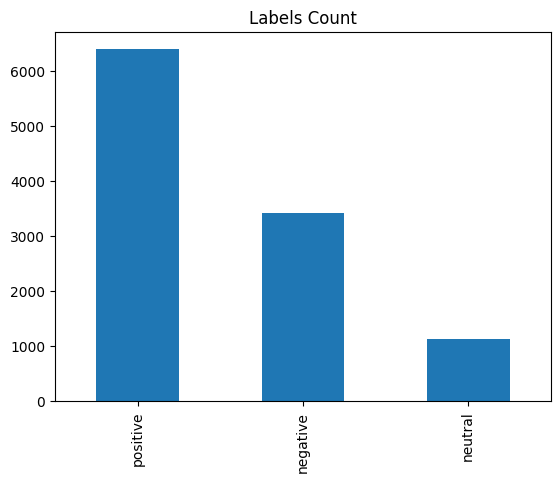

In [11]:
traints.Sentiment.value_counts().plot(kind='bar')
plt.title("Labels Count")

Text(0.5, 1.0, 'Total Character Mean From Each Label')

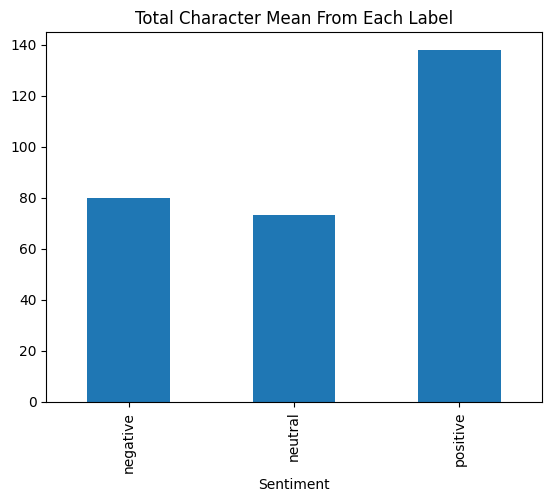

In [12]:
traints.groupby('Sentiment').total_char.mean().plot(kind='bar')
plt.title("Total Character Mean From Each Label")

Text(0.5, 1.0, 'Total Word Mean From Each Label')

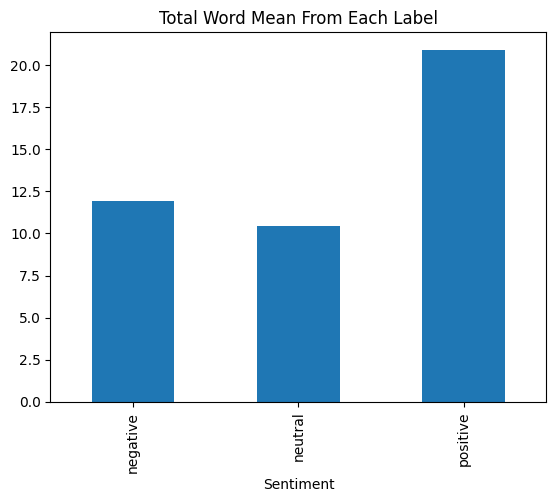

In [13]:
traints.groupby('Sentiment').total_word.mean().plot(kind='bar')
plt.title("Total Word Mean From Each Label")

Text(70, 39.0, 'Mean: 17.01')

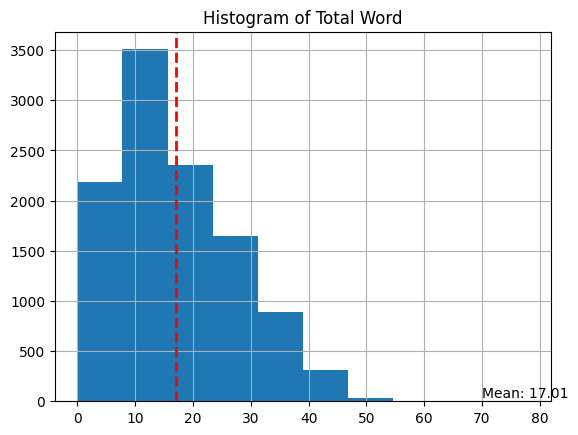

In [19]:
traints.total_word.hist()
plt.title("Histogram of Total Word")
plt.axvline(total_word_mean, color='r', linestyle='dashed', linewidth=2)
plt.text(x = traints.total_word.max()-8, y = traints.total_word.max()*0.5, s = 'Mean: {:.2f}'.format(total_word_mean), size = 10)

Text(420, 214.0, 'Mean: 113.05')

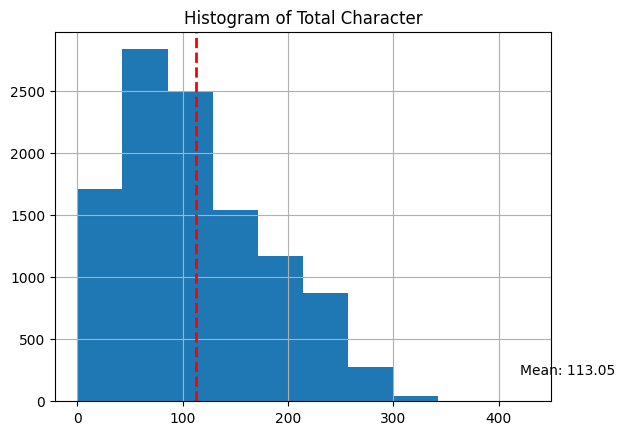

In [20]:
traints.total_char.hist()
plt.title("Histogram of Total Character")
plt.axvline(total_char_mean, color='r', linestyle='dashed', linewidth=2)
plt.text(x = traints.total_char.max()-8, y = traints.total_char.max()*0.5, s = 'Mean: {:.2f}'.format(total_char_mean), size = 10)

#### Range

In [14]:
range_total_word = traints.total_word.max()-traints.total_word.min()
range_total_char = traints.total_char.max()-traints.total_char.min()

print(f"Range dari total kata : {range_total_word} \nRange dari total karakter : {range_total_char}")

Range dari total kata : 78 
Range dari total karakter : 428


### Quantile

#### Quantile, Interquantile

In [15]:
#Nilai Minumum
p0 = traints.total_word.min()
#Nilai Maksimum
p100= traints.total_word.max()

# Nilai Q1, Q2, Q3 dan IRQ
q1 = traints.total_word.quantile(0.25)
q2 = traints.total_word.quantile(0.5)
q3 = traints.total_word.quantile(0.75)

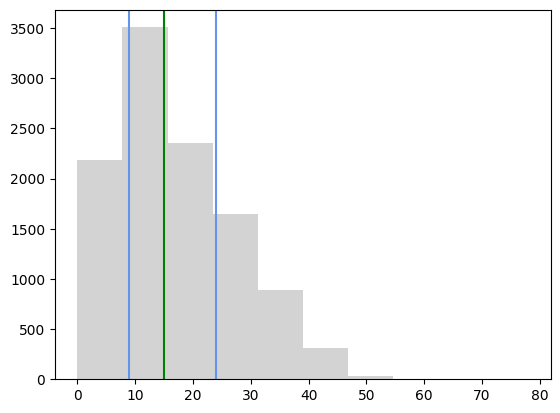

In [16]:
fig, ax = plt.subplots()
plt.axvline(x = q1, color='cornflowerblue')
plt.axvline(x = q2, color='green')
plt.axvline(x = q3, color='cornflowerblue')
_ = plt.hist(traints.total_word, color = 'lightgray')

In [17]:
iqr = q3 - q1

print(f"Nilai dari interquantile total kata : {iqr}")

Nilai dari interquantile total kata : 15.0


#### Outlier

In [18]:
batas_atas=q3 + 1.5 * iqr
batas_bawah = q1 - 1.5 * iqr

print("nilai batas bawah", batas_bawah)
print("nilai minimum", p0)

if batas_bawah < p0:
  print("tidak ada outlier pada batas bawah")
else:
  print("ada outlier pada batas bawah \n")

print("="*30)
print("nilai batas atas", batas_atas)
print("nilai maksimum", p100)

if batas_atas > p100:
  print("tidak ada outlier pada batas atas")
else:
  print("ada outlier pada batas atas")

nilai batas bawah -13.5
nilai minimum 0
tidak ada outlier pada batas bawah
nilai batas atas 46.5
nilai maksimum 78
ada outlier pada batas atas


### Measures of Dispersion

#### Variance

In [38]:
var_word  = traints['total_word'].var()
var_char = traints['total_char'].var()

print(f"Variance dari total kata : {var_word}")
print(f"Variance dari total karakter : {var_char}")

Variance dari total kata : 108.21067705438932
Variance dari total karakter : 4774.013347773815


#### Standard Deviation

In [35]:
sdv_word = traints['total_word'].std()
sdv_char = traints['total_char'].std()
print(f"Standard Deviasi dari total kata : {sdv_word}")
print(f"Standard Deviasi dari total karakter : {sdv_char}")

Standard Deviasi dari total kata : 10.40243611152644
Standard Deviasi dari total karakter : 69.09423527164778


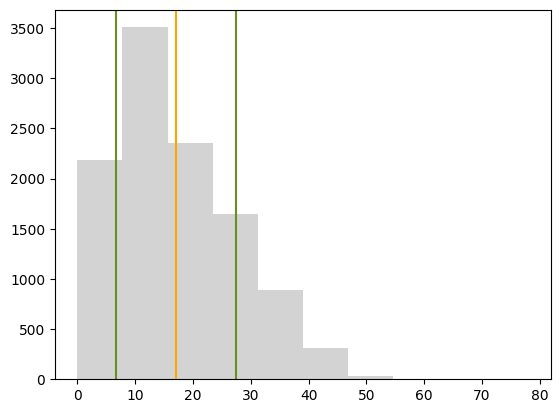

In [49]:
fig, ax = plt.subplots()
plt.axvline(x = total_word_mean, color='orange')
plt.axvline(x = total_word_mean+sdv_word, color='olivedrab')
plt.axvline(x = total_word_mean-sdv_word, color='olivedrab')
plt.title = ('Standard Deviation Word')
_ = plt.hist(traints.total_word, color = 'lightgray')

### Skewness & Kurtosis

In [33]:
print(f"Skewness dari total kata : {traints['total_word'].skew()}")
print(f"Skewness dari total karakter : {traints['total_char'].skew()}")

Skewness dari total kata : 0.6377992590101949
Skewness dari total karakter : 0.6248042069034766


In [34]:
print(f"Kurtosis dari total kata : {traints['total_word'].kurtosis()}")
print(f"Kurtosis dari total karakter : {traints['total_char'].kurtosis()}")

Kurtosis dari total kata : -0.2394908845528687
Kurtosis dari total karakter : -0.3242484661388052
